In [1]:
from  scipy.special import j1
from kSZ_forecast_general_func import *
snap_info=Snap_Info()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

n_halo =np.array([    1,     2,     3,     5,    7,     9,    30,   70])*10**-4 #8
def set_ticks(ax, x, y, x_t, y_t, ):
    
    f = interpolate.interp1d(x, np.arange(len(x)))
    
    ax.set_xticks(list(f(x_t)))
    ax.set_xticklabels(["%.1f" % number for number in x_t])

    f = interpolate.interp1d(y, np.arange(len(y)))
    ax.set_yticks(list(f(y_t)))
    ax.set_yticklabels(["%.1f" % number for number in y_t])


In [28]:
the_ap, np.mean(stack_signal, axis=1)

(array([1.        , 1.55555556, 2.11111111, 2.66666667, 3.22222222,
        3.77777778, 4.33333333, 4.88888889, 5.44444444, 6.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

# Mock CMB/kSZ

In [2]:
MAS = "NGP"
Grid = 512
Snapshot = 1631
Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
cnorm=ne0*sigma_t*Mpc2m*Boxlen*1.0/Grid*(1+snap_info.get_redshift(Snapshot))**2/h  # proj mom: km/h -> dkSZ/CMB

the_los=(45)*np.pi/180
n_rsd=np.array([np.cos(the_los),np.sin(the_los),0])

Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
Mom_dir = "/home/chenzy/data/mommap/mom"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
momp=snap_info.get_vel_norm(Snapshot)*np.fromfile(Mom_dir, dtype=np.float32, count=3*Grid**3, sep="").reshape(Grid,Grid,Grid,3)
denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
velp = momden2vel(denp, momp)
momp = (denp-1).reshape(Grid, Grid, Grid,1)*velp
momp_proj=proj1(momp,the_los)*cnorm

In [4]:
cmb_map_planck = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[1][0],sigma=cmbsur[1][1])
cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])
cmb_map_ = cmb2d(thelen=Thelen, grid = Grid)

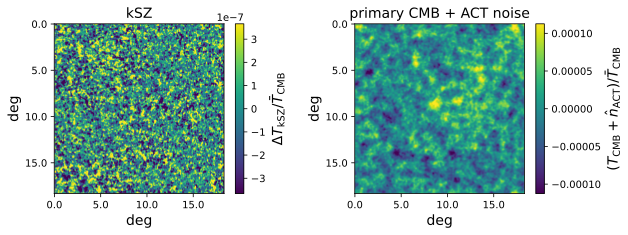

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (9, 3.3))
fontsize = 14
#cmb_map_act = cmb2d(thelen=Thelen, grid = Grid, Delta_T=cmbsur[0][0],sigma=cmbsur[0][1])

cax0 = ax[0].imshow(momp_proj, vmin=-np.std(momp_proj), vmax=np.std(momp_proj))
cbar = fig.colorbar(cax0, ax=ax[0])
cbar.set_label(r'$\Delta T_{\rm kSZ}/ \barT_{\rm CMB}$', fontsize = fontsize)
set_ticks(ax[0], x=np.linspace(0, Thelen[0]/np.pi*180, Grid), y=np.linspace(0, Thelen[0]/np.pi*180, Grid), x_t=[0, 5, 10, 15], y_t=[0, 5, 10, 15])
ax[0].set_xlabel("deg", fontsize = fontsize)
ax[0].set_ylabel("deg", fontsize = fontsize)


cax1 = ax[1].imshow(cmb_map_act, vmin=-3*np.std(cmb_map_act), vmax=3*np.std(cmb_map_act))
cbar = fig.colorbar(cax1, ax=ax[1])
cbar.set_label(r'$(T_{\rm CMB} + \hat n_{\rm ACT})/ \bar T_{\rm CMB}$', fontsize = fontsize)
set_ticks(ax[1], x=np.linspace(0, Thelen[0]/np.pi*180, Grid), y=np.linspace(0, Thelen[0]/np.pi*180, Grid), x_t=[0, 5, 10, 15], y_t=[0, 5, 10, 15])
ax[1].set_xlabel("deg", fontsize = fontsize)
ax[1].set_ylabel("deg", fontsize = fontsize)

plt.tight_layout()

ax[0].set_title("kSZ", fontsize = fontsize)
ax[1].set_title("primary CMB + ACT noise", fontsize = fontsize)
fig.savefig("figure/CMB_sky.pdf")

read DEN, MOM
read DEN, MOM
read DEN, MOM


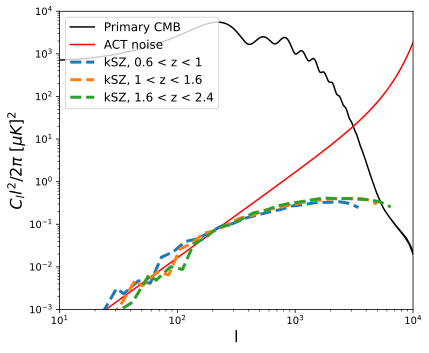

In [39]:
fig, ax = plt.subplots(figsize = (6, 5))
fig.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)
fontsize=16

l,cl_cmb=cmbcl()
ax.plot(l, cl_cmb*l**2/2/np.pi*T_cmb**2,"k", label = "Primary CMB")
l,cl_noise=cmbnoise(Delta_T=11,sigma=1.26)
ax.plot(l, cl_noise*l**2/2/np.pi*T_cmb**2, "r", label = "ACT noise")


for i in [0, 1, 2]:
    #break
    redshift_bin = i
    if redshift_bin == 0:
        Snapshot = 2746#2448
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI"
        gll = [0,1,2]
        rr = "0.6 < z < 1"
        z_eff = 0.8
        bias_g = 1.173
    if redshift_bin == 1:
        Snapshot = 2181#2448
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [3, 4, 5]
        rr = "1 < z < 1.6"
        z_eff = 1.3
        bias_g = 1.703
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        z_eff = 2.0
        bias_g = 2.739

    Thelen = Boxlen/h/cosmo.comoving_distance(z=z_eff).value
    cnorm=ne0*sigma_t*Mpc2m*Boxlen*1.0/Grid*(1+z_eff)**2/h  # proj mom: km/h -> dkSZ/CMB

    print("read DEN, MOM")
    Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
    Mom_dir = "/home/chenzy/data/mommap/mom"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
    momp=snap_info.get_vel_norm(Snapshot)*np.fromfile(Mom_dir, dtype=np.float32, count=3*Grid**3, sep="").reshape(Grid,Grid,Grid,3)
    denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
    velp = momden2vel(denp, momp)
    momp = (denp-1).reshape(Grid, Grid, Grid,1)*velp
    momp_proj=proj1(momp,the_los)*cnorm

    cl, l = fa.CalPS2d(momp_proj,grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
    ax.plot(l,cl*l**2/2/np.pi*T_cmb**2,"--", lw=3, label = "kSZ, "+rr)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("l", fontsize = fontsize)
ax.set_ylabel("$C_ll^2/2\pi\ [\mu K]^2$", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize-4)
ax.set_ylim(10**-3, 10**4)
ax.set_xlim(10, 10**4)
fig.savefig("figure/CMB_cl.pdf")

read DEN, MOM
read DEN, MOM
read DEN, MOM


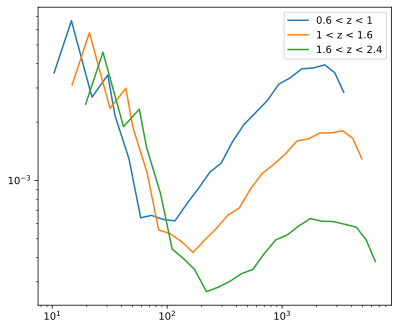

In [38]:
#test
fig, ax = plt.subplots(figsize = (6, 5))
fig.subplots_adjust(left=0.16, right=0.98, top=0.98, bottom=0.15)
fontsize=16

for i in [0, 1, 2]:
    #break
    redshift_bin = i
    if redshift_bin == 0:
        Snapshot = 2746#2448
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI"
        gll = [0,1,2]
        rr = "0.6 < z < 1"
        z_eff = 0.8
        bias_g = 1.173
    if redshift_bin == 1:
        Snapshot = 2181#2448
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [3, 4, 5]
        rr = "1 < z < 1.6"
        z_eff = 1.3
        bias_g = 1.703
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        z_eff = 2.0
        bias_g = 2.739

    Thelen = Boxlen/h/cosmo.comoving_distance(z=z_eff).value
    cnorm=ne0*sigma_t*Mpc2m*Boxlen*1.0/Grid*(1+z_eff)**2/h  # proj mom: km/h -> dkSZ/CMB

    print("read DEN, MOM")
    Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
    Mom_dir = "/home/chenzy/data/mommap/mom"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
    momp=snap_info.get_vel_norm(Snapshot)*np.fromfile(Mom_dir, dtype=np.float32, count=3*Grid**3, sep="").reshape(Grid,Grid,Grid,3)
    #ps, k = fa.CalPSvector(momp,grid=Grid,mapscale=(Boxlen/Grid**2)**3, kscale=2*np.pi/Boxlen)
    #denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
    #velp = momden2vel(denp, momp)
    #momp = (denp-1).reshape(Grid, Grid, Grid,1)*velp
    momp_proj=proj1(momp,the_los)#*cnorm
    ps, k = fa.CalPS2d(momp_proj,grid=Grid,mapscale=(Thelen/Grid**2)**2, kscale=2*np.pi/Thelen)
    ax.plot(k, ps*k**2/np.pi, label=rr)

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

In [34]:
(3/1.8)**4

7.716049382716046

# stack result

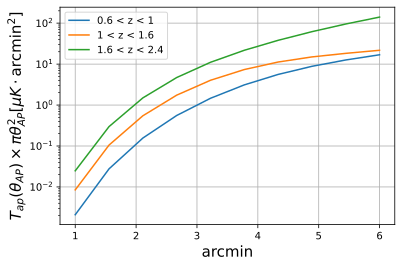

In [12]:
fig, ax = plt.subplots()

Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap

HOD_random_seed = 100

the_ap = np.linspace(1,6,10)
for ii in [0, 1, 2]:
    redshift_bin = ii

    if redshift_bin == 0:
        Snapshot = 2448
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
        f_sky_factor = np.sqrt(1.38/1.2**3)
    if redshift_bin == 1:
        Snapshot = 2448
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
        f_sky_factor = np.sqrt(3.24/1.2**3)
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        f_sky_factor = np.sqrt(5.29/1.2**3)

    Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
    
    for i in [0]:
        galaxy_number_density_label = gll[i]
        for j in [3]:
            mass_selection_label2 = j
            stack_signal = np.zeros((10,50))
            for k in range(50):
                filename = "/home/chenzy/code/kSZ_forecast/stack_prediction_results/mbin_RedshiftBin"+ str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_HOD_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(gll[galaxy_number_density_label])+"l"+str(mass_selection_label2)+"ACT"+str(k).zfill(3)+"_seed"+str(HOD_random_seed)+".npz"
                #print(filename)
                if not os.path.exists(filename):
                    print("no", gll[i], j, k)
                    #print(filename)
                    continue
                d = np.load(filename)
                stack_signal[:, k] = np.mean(d["stack_signal"], axis=1)
                
            #ax.plot(the_ap, np.mean(stack_signal, axis=1))
            ax.plot(the_ap, np.mean(stack_signal, axis=1)*np.pi*(the_ap)**2, label = rr)
ax.set_yscale("log")
ax.legend()
ax.set_xlabel("arcmin", fontsize=15)
ax.set_ylabel(r"$T_{ap}(\theta_{AP})\times \pi\theta_{AP}^2 [\mu K\cdot {\rm arcmin}^2]$", fontsize=15)
#ax.grid()
%config InlineBackend.figure_format = 'svg'
#fig.savefig("figure/stack_result.pdf")
#%config InlineBackend.figure_format = 'png'

# stack S/N

0.8936504412303007
0 0 r 0.3573577652601801
0 1 r 0.3642166109860891
0 2 r 0.3694610450540589
0 3 r 0.3737944262026358
0 4 r 0.377286925752876
0 5 r 0.38259096748825405
0 6 r 0.3790694215587354
0 7 r 0.3813255454890085
2 0 r 0.3551001353459772
2 1 r 0.36220634981622263
2 2 r 0.3677576784665007
2 3 r 0.372351590514533
2 4 r 0.37606489316085245
2 5 r 0.38097948935237813
2 6 r 0.377717442648261
2 7 r 0.3800446902735512
1.3693063937629155
0 0 r 0.342799755083787
0 1 r 0.3605394938553303
0 2 r 0.37167964332749565
0 3 r 0.37830941081878394
0 4 r 0.3795936960445307
0 5 r 0.37878700875238686
0 6 r 0.3852284569966383
0 7 r 0.38990527399465014
2 0 r 0.33986136401383493
2 1 r 0.35835903170290273
2 2 r 0.3695150533055098
2 3 r 0.3763874855706396
2 4 r 0.377769643272663
2 5 r 0.37709243538509823
2 6 r 0.38357160393600237
2 7 r 0.38829152542891804
1.7496692809192809
0 0 r 0.3629325807004889
0 1 r 0.38338366581550143
0 2 r 0.39306857820094665
0 3 r 0.39363570115556046
0 4 r 0.3987620510304799
0 5 r 0

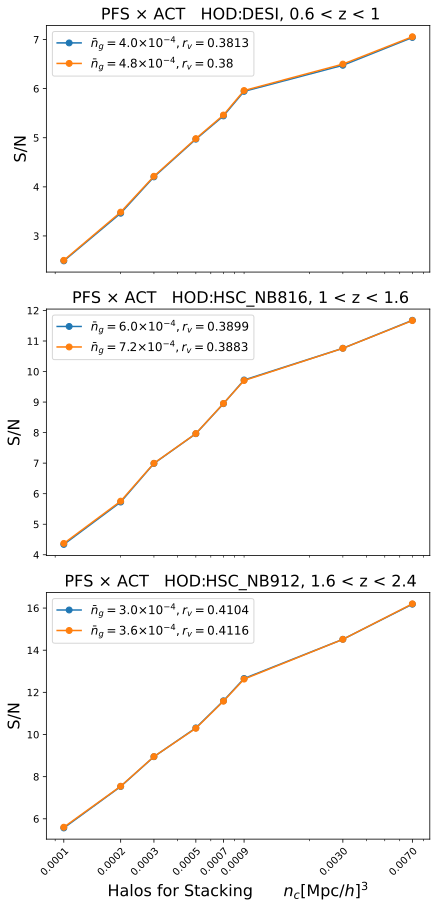

In [4]:
fig, ax = plt.subplots(3,1, figsize = (6.5, 13), gridspec_kw={"hspace":0.15}, )
fig.subplots_adjust(left=0.15, right=0.97, top=0.97, bottom=0.1)

Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seed = 100

for ii in [0, 1, 2]:
    redshift_bin = ii

    if redshift_bin == 0:
        Snapshot = 2746
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
        f_sky_factor = np.sqrt(1.38/1.2**3)
    if redshift_bin == 1:
        Snapshot = 2181
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
        f_sky_factor = np.sqrt(3.24/1.2**3)
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"
        f_sky_factor = np.sqrt(5.29/1.2**3)

    Thelen = Boxlen/h/cosmo.comoving_distance(z=snap_info.get_redshift(Snapshot)).value
    print(f_sky_factor)

    SN = np.zeros((3, 8, 50))
    for i in [0, 2]:
        galaxy_number_density_label = gll[i]
        for j in range(8):
            mass_selection_label2 = j
            for k in range(50):
                filename = "/home/chenzy/code/kSZ_forecast/stack_prediction_results/mbin_RedshiftBin"+ str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_HOD_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(gll[galaxy_number_density_label])+"l"+str(mass_selection_label2)+"ACT"+str(k).zfill(3)+"_seed"+str(HOD_random_seed)+".npz"
                #print(filename)
                if not os.path.exists(filename):
                    print("no", gll[i], j, k)
                    print(filename)
                    continue
                d = np.load(filename)
                stack_signal = d["stack_signal"]
                r = (d["r_true_rec"])
                if k==0:
                    print(i, j, "r", r)
                stack_mean, corv = error_esti_jackknife(stack_signal)
                C_ = pseudo_inverse(corv,3)
                chi_null = cal_chi_square(stack_mean, stack_mean, C_)
                if chi_null<0:print(i, j, k)
                SN[i, j, k] = np.sqrt(chi_null)*f_sky_factor

            #break
            #print(np.mean(SN[i,j,:]))
        SN_array = np.zeros(8)
        temp = np.sum(SN[i, :,:], axis = 1)/ np.sum(SN[i, :,:]>0, axis = 1)
        for jj in range(8):
            SN_array[jj] = np.sqrt(np.sum(temp[:jj+1]**2))
        ax[ii].plot(n_halo, SN_array, "-o", label = r"$\bar n_g = $"+str(np.round(n_gal[i]*10**4,3))+r"$\times 10^{-4}, r_v=$"+str(np.round(r, 4)))
        #ax[ii].plot(n_halo, np.sum(SN[i, :,:], axis = 1)/ np.sum(SN[i, :,:]>0, axis = 1), "-o", label = r"$\bar n_g = $"+str(np.round(n_gal[i]*10**4,3))+r"$\times 10^{-4}, r=$"+str(np.round(r, 4)))
        #break

    plt.setp(ax[ii].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    ax[ii].legend(fontsize =12)
    ax[ii].set_xscale("log")
    label_nhalo = ["%.4f" % number for number in n_halo]
    ax[ii].set_xticks(n_halo, labels=label_nhalo)
    
    ax[ii].set_ylabel("S/N", fontsize=16)
    ax[ii].set_title(" PFS "+r"$\times$ ACT   HOD:"+HOD_model+", "+rr, fontsize=16)
    #ax.set_ylim(10, 22)
    #ax[ii].grid()
    if ii < 2: ax[ii].set_xticks([])
ax[2].set_xlabel("Halos for Stacking \t"+r"$n_c [{\rm Mpc}/h]^{3}$", fontsize=16)
%config InlineBackend.figure_format = 'svg'
fig.savefig("figure/stack_SN.pdf")
#%config InlineBackend.figure_format = 'png'

In [23]:
ax

<AxesSubplot:xlabel='Redshift range', ylabel='S/N'>

# tomography r(k)

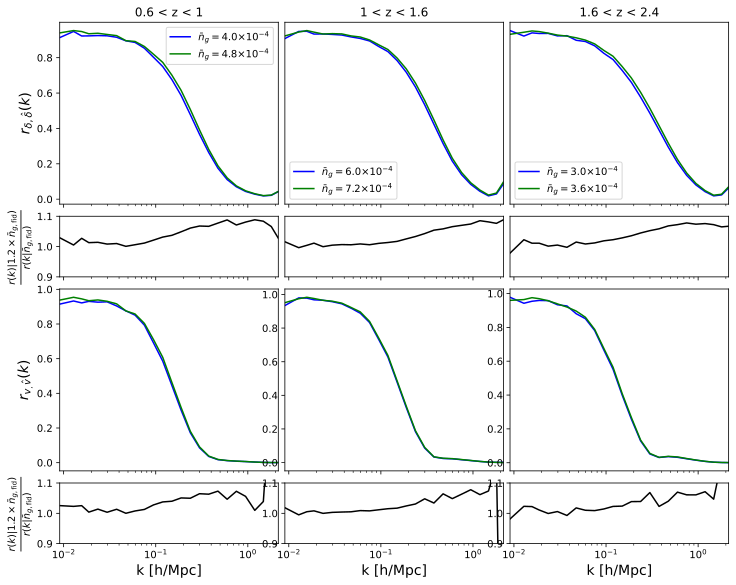

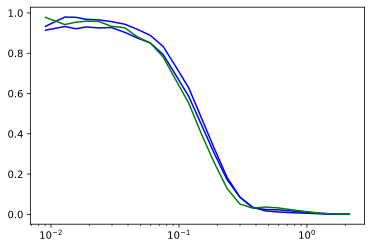

In [13]:
fig, ax = plt.subplots(4, 3, figsize = (4*3, 4.8*2), sharex = True, gridspec_kw={"height_ratios":[3, 1, 3, 1], "hspace":0.1,"wspace":0.03})
fig1, ax1 = plt.subplots()
Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seed = 300

SN = np.zeros((3,3))
cor = np.zeros((3,3, 25))
ps = np.zeros((3,3, 25))
ps_rec = np.zeros((3,3, 25))
c = ["b", "b", "g"]
for ii in [0,1,2]:
    redshift_bin = ii
    if redshift_bin == 0:
        Snapshot = 2746
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
    if redshift_bin == 1:
        Snapshot = 2181
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"

    for i in [0, 2]:
        galaxy_number_density_label=gll[i]
        filename =  "tomography_prediction_results/RedshiftBin"+str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_gal_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(galaxy_number_density_label)+"_seed"+str(HOD_random_seed)+".npz"
        if not os.path.exists(filename):
            print(filename)
            continue
        d = np.load(filename)
        print(d)
        SN[ii, i] = d["SN"]
        cor = d["cor"]
        ps = d["ps"]
        ps_rec = d["ps_rec"]
        l = d["l"]
        k = d["k"]
        r_den = d["r_den"]
        r_vel = d["r_vel"]
        r_mom = d["r_mom"]
        #ax.plot(k, r_mom)
        if i==0:
            cor0 = cor
            ps_rec0 = ps_rec
            r_den0 = r_den
            r_vel0 = r_vel
        #ax.plot(l, (cor/cor0)**2, c=c[i])
        #ax.plot(l, ps_rec/ps_rec0, ":", c=c[i])
        ax[0, ii].plot(k, r_den, c=c[i], label = r"$\bar n_g = $"+str(np.round(n_gal[i]*10**4,3))+r"$\times 10^{-4}$")
        ax[2, ii].plot(k, r_vel, c=c[i], label = r"$\bar n_g = $"+str(np.round(n_gal[i]*10**4,3))+r"$\times 10^{-4}$")
        if i>0:
            ax[1, ii].plot(k, r_den/r_den0, c="k")
            ax[3, ii].plot(k, r_vel/r_vel0, c="k")
        ax[0, ii].set_xscale("log")
        ax[1, ii].set_xscale("log")
        ax[2, ii].set_xscale("log")
        ax[3, ii].set_xscale("log")
        
        ax[3, ii].set_xlabel("k [h/Mpc]", fontsize=14)
        ax[3, ii].set_ylim(0.9, 1.1)
        ax[1, ii].set_ylim(0.9, 1.1)
        ax[0, ii].set_xlim(k[0], k[-1])
        ax[0, ii].set_title(rr)
        ax[0, ii].legend()
        if i==0: ax1.plot(k, r_vel, c=c[ii])
        ax[0, ii].grid(which ="Both")
        if ii>0: 
            ax[0,ii].set_yticks([])
            ax[1,ii].set_yticks([])

ax1.set_xscale("log")
ax[0, 0].set_ylabel("$r_{\delta\hat \delta}(k)$", fontsize=14)
ax[1, 0].set_ylabel(r"$\frac{r(k)|1.2\times\bar n_{g, \rm fid})}{r(k|\bar n_{g, \rm fid})}$", fontsize=14)
ax[2, 0].set_ylabel("$r_{ v_\hat  v}(k)$", fontsize=14)
ax[3, 0].set_ylabel(r"$\frac{r(k)|1.2\times\bar n_{g, \rm fid})}{r(k|\bar n_{g, \rm fid})}$", fontsize=14)

%config InlineBackend.figure_format = 'svg'
fig.savefig("figure/rk.pdf")
#%config InlineBackend.figure_format = 'png'

In [4]:
d.files

['l', 'cor', 'ps_rec', 'ps', 'l_array', 'NS', 'SN']

# tomography S/N

[[ 2.95337882  3.00126099  3.41838218]
 [17.79500543 18.43744258 19.25148689]
 [18.88936552 20.39300577 21.16839124]]
[1.15744792 1.08184777 1.12065126]
[0.0003  0.00033 0.00036]


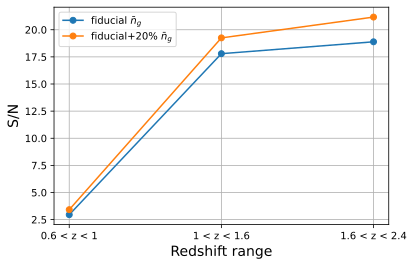

In [18]:
Grid = 512

den_method = 0   #NGP
vel_method = 0   #thetap
HOD_random_seed = 100

SN = np.zeros((3,3))
for ii in [0,1,2]:
    redshift_bin = ii
    if redshift_bin == 0:
        Snapshot = 2746#2448
        n_gal = np.array([4, 4.4, 4.8])*10**-4
        HOD_model = "DESI" 
        gll = [0, 1, 2]
        rr = "0.6 < z < 1"
    if redshift_bin == 1:
        Snapshot = 2181#2448
        n_gal = np.array([6, 6.6, 7.2])*10**-4
        HOD_model = "HSC_NB816"
        gll = [0,1,2]
        rr = "1 < z < 1.6"
    if redshift_bin == 2:
        Snapshot = 1631
        n_gal = np.array([3, 3.3, 3.6])*10**-4
        HOD_model = "HSC_NB912"
        gll = [0,1,2]
        rr = "1.6 < z < 2.4"

    for i in [0,1,2]:
        galaxy_number_density_label=gll[i]
        filename =  "tomography_prediction_results/RedshiftBin"+str(redshift_bin)+"S"+str(Snapshot)+"G"+str(Grid)+"_gal_"+HOD_model+"_den"+str(den_method)+"vel"+str(vel_method)+"l"+str(galaxy_number_density_label)+"_seed"+str(HOD_random_seed)+".npz"
        if not os.path.exists(filename):
            print(filename)
            continue
        d = np.load(filename)
        SN[ii, i] = d["SN"]
print(SN)
print(SN[:,2]/SN[:,0])
print(n_gal)
fig, ax = plt.subplots()
ax.plot(range(3), SN[:,0], '-o', label =r"fiducial $\bar n_g$")
ax.plot(range(3), SN[:,2], '-o', label =r"fiducial+20% $\bar n_g$")

#plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
'''
ax.set_xscale("log")
label_ngal = ["%.5f" % number for number in n_gal]
print(n_gal)
ax.set_xticks(n_gal, labels=label_ngal)
'''

#ax.set_xlabel("Halos for velocity reconstruction \n"+r"$n [\rm h/cMpc]^{3}$", fontsize=14)
ax.set_xlabel("Redshift range", fontsize=14)
ax.set_ylabel("S/N", fontsize=14)
#label_ngal = ["%.5f" % number for number in n_gal]
#ax.set_xticks(n_gal, labels=label_ngal)
ax.set_xticks(range(3), labels=["0.6 < z < 1", "1 < z < 1.6", "1.6 < z < 2.4"])
#ax.set_title("S/N prediction: Tomography method\n PFS "+r"$\times$ ACT HOD:"+HOD_model+", "+rr, fontsize=14)
ax.grid()
ax.legend()
%config InlineBackend.figure_format = 'svg'
fig.savefig("figure/tomography_SN.pdf")
#%config InlineBackend.figure_format = 'png'

# APP: gaussian filter

redshift bin: 1 < z < 1.6


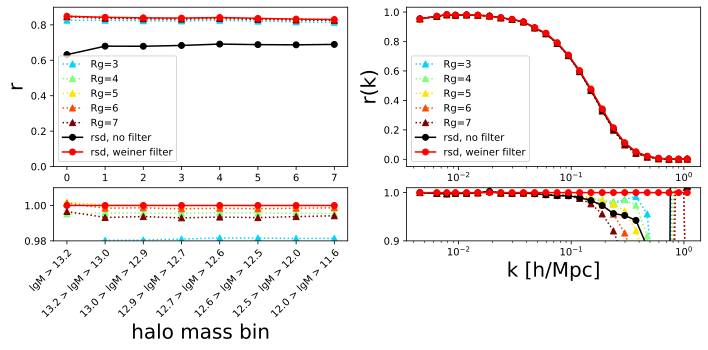

In [24]:
redshift_bin=1
MAS = "NGP"
Grid = 512
filename="test_rec_method/test_redshiftbin"+str(redshift_bin)+".npy"
(r_halo_rec_0, sigma_v_rec_0, r_halo_rec_1, sigma_v_rec_1, r_halo_rec_no_rsd, sigma_v_rec_no_rsd, r_halo_rec_g,sigma_v_rec_g, r_halo_rec_w, sigma_v_rec_w, k, rk_g, rk_no_rsd, rk_0, rk_1, rk_w) =np.load(filename, allow_pickle = True)
#filename="test_rec_method/test_redshiftbin"+str(redshift_bin)+"_"+str(Grid)+"_"+MAS+".npy"
#r_halo_rec_0, sigma_v_rec_0, r_halo_rec_1, sigma_v_rec_1, r_halo_rec_no_rsd, sigma_v_rec_no_rsd, r_halo_rec_g,sigma_v_rec_g, r_halo_rec_w, sigma_v_rec_w, k, rk_g, rk_no_rsd, rk_0, rk_1, rk_w = np.load(filename, allow_pickle=True)
k = k*np.pi/Boxlen
if redshift_bin == 0:
    Snapshot = 2448
    lgM_min = np.array([13.21616884, 13.00613391, 12.87405033, 12.6986018 , 12.56470822, 12.47015211, 11.99107016, 11.62894912])
    n_gal = np.array([4, 4.4, 4.8])*10**-4
    HOD_model = "DESI"
    gll = [0,1,2]
    rr = "0.6 < z < 1"
    z_eff = 0.8
if redshift_bin == 1:
    Snapshot = 2448
    lgM_min = np.array([13.21616884, 13.00613391, 12.87405033, 12.6986018 , 12.56470822, 12.47015211, 11.99107016, 11.62894912])
    n_gal = np.array([6, 6.6, 7.2])*10**-4
    HOD_model = "HSC_NB816"
    gll = [0,1,2]
    rr = "1 < z < 1.6"
    z_eff = 1.3
if redshift_bin == 2:
    Snapshot = 1631
    lgM_min = np.array([12.84230083, 12.66537838, 12.54430498, 12.39486591, 12.29210015, 12.2125257 , 11.80201392, 11.48552698])
    n_gal = np.array([3, 3.3, 3.6])*10**-4
    HOD_model = "HSC_NB912"
    gll = [0,1,2]
    rr = "1.6 < z < 2.4"
    z_eff = 2.0

mass_bin_label = []
for i in range(len(lgM_min)):
    if i == 0:
        mass_bin_label.append("lgM > "+str(np.round(lgM_min[i], 1)))
    else:
        mass_bin_label.append(str(np.round(lgM_min[i-1], 1))+" > lgM > "+ str(np.round(lgM_min[i], 1)))
    

Rg = [1, 2, 3,4, 5,6, 7, 10]
import matplotlib.colors as colors
import matplotlib.cm as cmx
jet = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=1, vmax=7)
scalarmap=cmx.ScalarMappable(norm=cNorm, cmap=jet)
fig, ax = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw={"height_ratios":[3, 1]})
fig.subplots_adjust(left=0.08, right=0.98, top=0.97, bottom=0.32)
Rg = [1, 2, 3, 4, 5,6, 7, 10]
for i in range(len(Rg)):
    colorVal = scalarmap.to_rgba(Rg[i])
    if Rg[i]<3 or Rg[i]>8: continue
    ax[0, 0].plot(r_halo_rec_g[:,i], ":^", c = colorVal, label = "Rg="+str(Rg[i]))
    ax[0, 1].plot(k, rk_g[:,i], ":^", c = colorVal, label = "Rg="+str(Rg[i]))
    ax[1, 0].plot(r_halo_rec_g[:,i]/r_halo_rec_w, ":^", c = colorVal, label = "Rg="+str(Rg[i]))
    ax[1, 1].plot(k, rk_g[:,i]/rk_w, ":^", c = colorVal, label = "Rg="+str(Rg[i]))
    
    
#ax[0, 0].plot(r_halo_rec_0, "-o", label = "rec from denp")
#ax[0, 0].plot(r_halo_rec_no_rsd, "-o", label="no rsd")
ax[0, 0].plot(r_halo_rec_1, "k-o", label = "rsd, no filter")
ax[0, 0].plot(r_halo_rec_w, "r-o", label = "rsd, weiner filter")
ax[0, 0].set_ylim(0., 0.9)
#ax[0, 0].set_xlabel("halo mass bin", fontsize=20)
ax[0, 0].set_ylabel("r", fontsize=20)
ax[0, 0].legend()

#ax[1, 0].plot(r_halo_rec_0/r_halo_rec_w, "-o", label = "rec from denp")
#ax[1, 0].plot(r_halo_rec_no_rsd/r_halo_rec_w, "-o", label="no rsd")
ax[1, 0].plot(r_halo_rec_1/r_halo_rec_w, "k-o", label = "rsd, no filter")
ax[1, 0].plot(r_halo_rec_w/r_halo_rec_w, "r-o",  label = "rsd, weiner filter")
ax[1, 0].set_xlabel("halo mass bin", fontsize=20)
#ax[1, 0].set_ylabel("r", fontsize=20)
ax[1, 0].set_ylim(0.98, 1.01)



#ax[0, 1].plot(k, rk_0, "-o", label = "rec from denp")
#ax[0, 1].plot(k, rk_no_rsd, "-o", label="no rsd")
ax[0, 1].plot(k, rk_1, "k-o", label = "rsd, no filter")
ax[0, 1].plot(k, rk_w, "r-o", label = "rsd, weiner filter")

ax[0, 1].set_xscale("log")
#ax[0, 1].set_xlabel("k [h/Mpc]", fontsize=20)
ax[0, 1].set_ylabel("r(k)", fontsize=20)
ax[0, 1].legend()

#ax[1, 1].plot(k, rk_0/rk_w, "-o", label = "rec from denp")
#ax[1, 1].plot(k, rk_no_rsd/rk_w, "-o", label="no rsd")
ax[1, 1].plot(k, rk_1/rk_w, "k-o", label = "rsd, no filter")
ax[1, 1].plot(k, rk_w/rk_w, "r-o", label = "rsd, weiner filter")

ax[1, 1].set_xscale("log")
ax[1, 1].set_xlabel("k [h/Mpc]", fontsize=20)
#ax[1, 1].set_ylabel("r(k)", fontsize=20)
ax[1, 1].set_ylim(0.9, 1.01)

plt.setp(ax[1, 0].get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
ax[1, 0].set_xticks(range(len(lgM_min)), labels=mass_bin_label)

print("redshift bin:", rr)
fig.savefig("figure/rk_"+str(redshift_bin)+".pdf")